# Postprocessing RL results

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # "Times", "Palatino", "New Century Schoolbook", "Bookman", 
    "axes.labelsize": 14
    })
import os

Agent names:

In [34]:
agent_names = ["MC_agent", "SARSA_agent", "Q_agent"]
labels = ["MC", "SARSA", "Q"]
colors = ["blue", "red", "green"]

In [16]:
def cumulative_average(arr):
    """
    Computes a cumulative average of a given array.
    """
    # Calculate cumulative sum
    cum_sum = np.cumsum(arr)
    # Create array of cumulative counts
    cum_count = np.arange(1, len(arr) + 1)
    
    # Calculate cumulative average
    return cum_sum / cum_count  

In [23]:
def get_returns(room, n_episodes=1000, filename = "returns.csv", use_avg = True):
    """
    Gets the returns for a certain room for all three agents.
    """
    returns = np.zeros((3, n_episodes))
    for i, name in enumerate(agent_names):
        val = np.loadtxt(f"RL/Plots/{name}/{room}/{filename}")
        if use_avg:
            val = cumulative_average(val)
        returns[i] = val
        
    return np.array(returns)

# Comparing agents behaviour

## Empty room

Plot their average returns

In [29]:
df = np.loadtxt("RL/Plots/Q_agent/empty-room/returns.csv")
df.shape

(1000,)

(3, 1000)

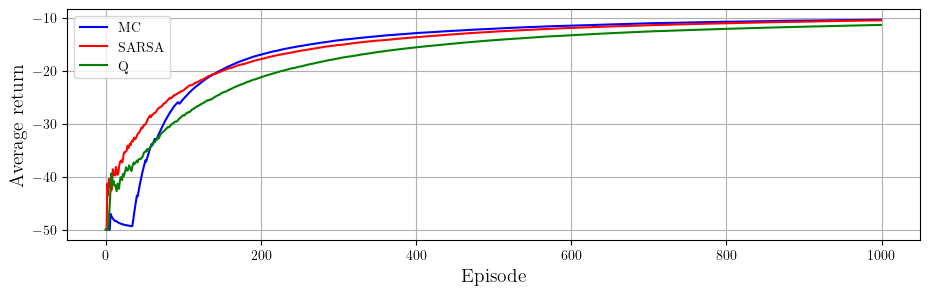

In [43]:
returns = get_returns("empty-room")

plt.figure(figsize=(11, 3))
for i, ret in enumerate(returns):
    plt.plot(ret, "-", color=colors[i], label=labels[i])
plt.grid()
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Average return")
plt.show()